In [1]:
import cv2
import numpy as np
import os
import glob
import random
import matplotlib.pyplot as plt


In [ ]:
base_path = os.getcwd()
output_color_path = os.path.join(base_path, 'rcnn/refined_rcnn_v2')

print(f"Saved to : {output_color_path}")

# lower_hsv = np.array([10, 40, 40])   
# upper_hsv = np.array([90, 255, 255]) 

lower_hsv = np.array([0, 0, 0])   
upper_hsv = np.array([127, 127, 127]) 


source_dirs = {
    'train':['Apple___Apple_scab',
            'Apple___Black_rot',
            'Apple___Cedar_apple_rust',
            'Apple___healthy'],
    'valid':['Apple___Apple_scab',
            'Apple___Black_rot',
            'Apple___Cedar_apple_rust',
            'Apple___healthy']
}

Saved to : /run/media/shared_storage/Documents/KuliahUbS1/Semester11_2025_2026/A_Pengolahan_Citra_Digital_dan_Visi_Komputer/tugas_kel_pcdvk/proyek_akhir/apple_leaf_dataset/rcnn/refined_rcnn


image_files: ['rcnn/train_rcnn/Apple___Apple_scab/1f97d75c-db85-4344-8687-82ca56454d17___FREC_Scab 3408.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_270deg.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_90deg.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_new30degFlipLR.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_90deg.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_new30degFlipLR.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/03eccb1a-0368-4ac7-9f48-7546037b775a___FREC_Scab 3334.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/03eccb1a-0368-4ac7-9f48-7546037b775a_

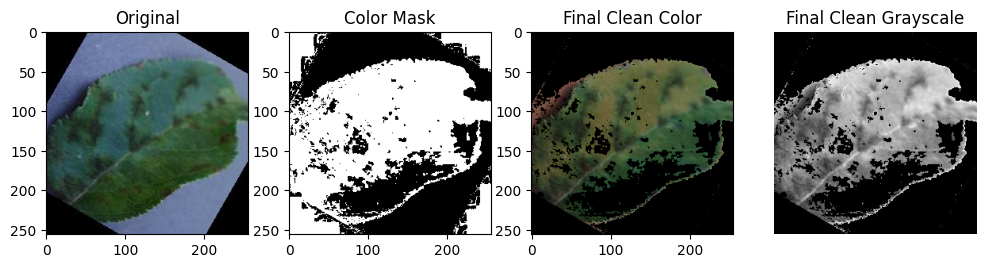

In [18]:
for data_type, folders in source_dirs.items():
    # def preprosessegmentasi(output_color_path, lower_hsv, upper_hsv, data_type)
    # folder = os.listdir( os.path.join('rcnn',f'{data_type}_rcnn',folders) )
    for folder_paths in folders:
        folder_path = os.path.join('rcnn',f'{data_type}_rcnn',folder_paths)
        if not os.path.exists(folder_path): 
            print(f"folder {folder_path} tidak ada")
            continue

        class_name = os.path.basename(folder_path)
        # print(class_name)
        output_folder = os.path.join(output_color_path, data_type, class_name)
        os.makedirs(output_folder, exist_ok=True)

        image_files = []
        for ext in ['*.jpg', '*.jpeg', '*.png', '*.JPG']:
            # image_files.extend(glob.glob(os.path.join(folder_path, ext)))
            image_files.extend(glob.glob(os.path.join(folder_path, ext)))

        print(f'image_files: {image_files}')
        if not image_files: 
            continue

        sample_file = random.choice(image_files)
        img_sample = cv2.imread(sample_file)
        if img_sample is not None:
        
            hsv_sample = cv2.cvtColor(img_sample, cv2.COLOR_BGR2HSV)
            mask_sample = cv2.inRange(hsv_sample, lower_hsv, upper_hsv)
            masked_img_sample = cv2.bitwise_and(img_sample, img_sample, mask=mask_sample)
            gray_masked_sample = cv2.cvtColor(masked_img_sample, cv2.COLOR_BGR2GRAY)

            plt.figure(figsize=(12, 4))
            plt.subplot(1, 4, 1); plt.imshow(cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGB)); plt.title("Original")
            plt.subplot(1, 4, 2); plt.imshow(mask_sample, cmap='gray'); plt.title("Color Mask")
            plt.subplot(1, 4, 3); plt.imshow(masked_img_sample, cmap='gray'); plt.title("Final Clean Color")
            plt.subplot(1, 4, 4); plt.imshow(gray_masked_sample, cmap='gray'); plt.title("Final Clean Grayscale")
            plt.axis('off')
            plt.show()

        break
    break

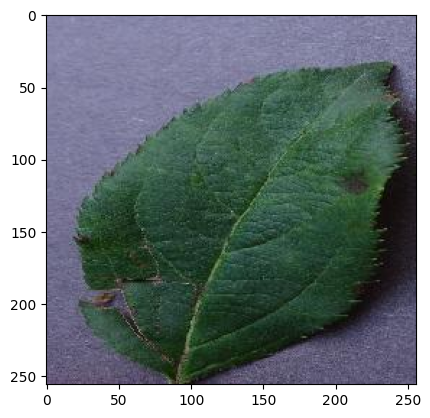

In [26]:
file = 'rcnn/train_rcnn/Apple___Apple_scab/1f97d75c-db85-4344-8687-82ca56454d17___FREC_Scab 3408.JPG'
# file = 'rcnn/train_rcnn/Apple___Apple_scab/5f312356-04d0-44d0-ba06-4e3c33907b03___FREC_Scab 3349_90deg.JPG'

img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

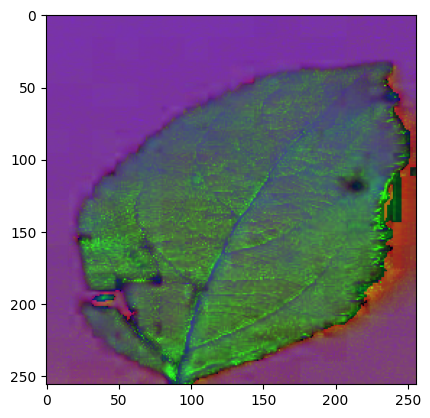

In [27]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)

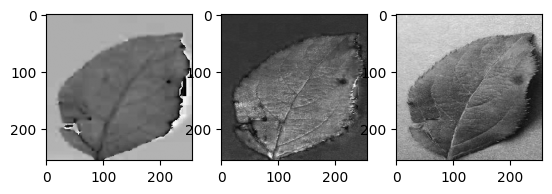

In [33]:
fig, axs = plt.subplots(1, 3)
h,s,v = cv2.split(img_hsv)

axs[0].imshow(h, cmap='gray')
axs[1].imshow(s, cmap='gray')
axs[2].imshow(v, cmap='gray')


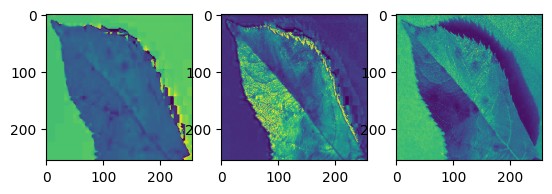

In [25]:
fig, axs = plt.subplots(1, 3)
h,s,v = cv2.split(img_hsv)

axs[0].imshow(h)
axs[1].imshow(s)
axs[2].imshow(v)


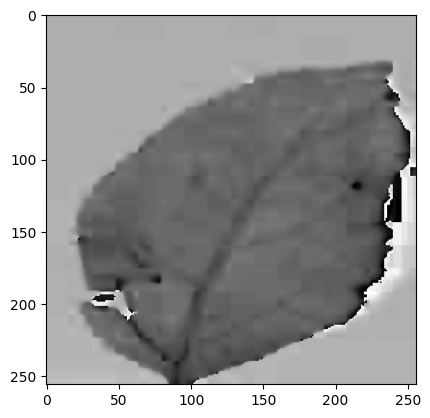

In [41]:
plt.imshow(h,cmap='gray')

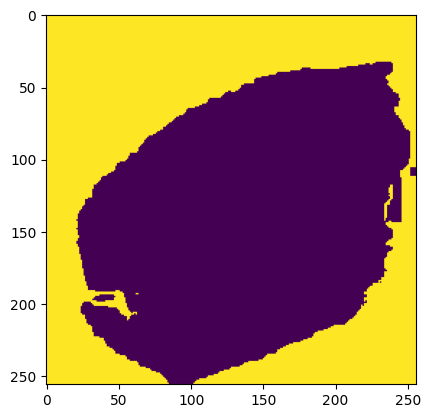

In [72]:
ret, h_biner = cv2.threshold(h, 90, 200, type=cv2.THRESH_BINARY)

plt.imshow(h_biner)

image_files: ['rcnn/train_rcnn/Apple___Apple_scab/1f97d75c-db85-4344-8687-82ca56454d17___FREC_Scab 3408.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_270deg.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_90deg.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_new30degFlipLR.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_90deg.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_new30degFlipLR.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/03eccb1a-0368-4ac7-9f48-7546037b775a___FREC_Scab 3334.JPG', 'rcnn/train_rcnn/Apple___Apple_scab/03eccb1a-0368-4ac7-9f48-7546037b775a_

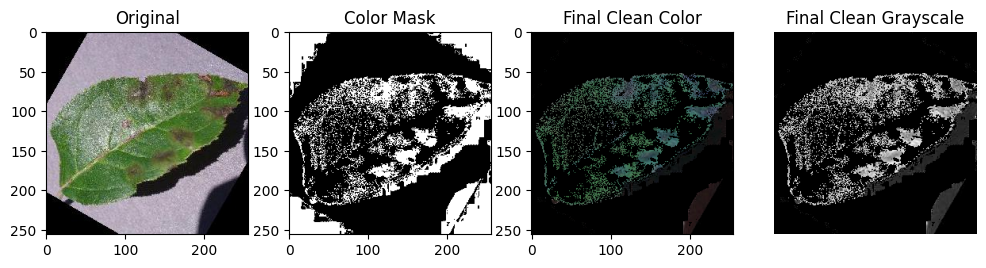

In [76]:
for data_type, folders in source_dirs.items():
    # def preprosessegmentasi(output_color_path, lower_hsv, upper_hsv, data_type)
    # folder = os.listdir( os.path.join('rcnn',f'{data_type}_rcnn',folders) )
    for folder_paths in folders:
        folder_path = os.path.join('rcnn',f'{data_type}_rcnn',folder_paths)
        if not os.path.exists(folder_path): 
            print(f"folder {folder_path} tidak ada")
            continue

        class_name = os.path.basename(folder_path)
        # print(class_name)
        output_folder = os.path.join(output_color_path, data_type, class_name)
        os.makedirs(output_folder, exist_ok=True)

        image_files = []
        for ext in ['*.jpg', '*.jpeg', '*.png', '*.JPG']:
            # image_files.extend(glob.glob(os.path.join(folder_path, ext)))
            image_files.extend(glob.glob(os.path.join(folder_path, ext)))

        print(f'image_files: {image_files}')
        if not image_files: 
            continue

        sample_file = random.choice(image_files)
        img_sample = cv2.imread(sample_file)
        if img_sample is not None:
        
            hsv_sample = cv2.cvtColor(img_sample, cv2.COLOR_BGR2HSV)

            mask_sample = cv2.inRange(hsv_sample, lower_hsv, upper_hsv)
            # h,s,v = cv2.split(hsv_sample)
            # ret, mask_sample = cv2.threshold(h, 90, 200, type=cv2.THRESH_BINARY)

            masked_img_sample = cv2.bitwise_and(img_sample, img_sample, mask=mask_sample)
            gray_masked_sample = cv2.cvtColor(masked_img_sample, cv2.COLOR_BGR2GRAY)

            plt.figure(figsize=(12, 4))
            plt.subplot(1, 4, 1); plt.imshow(cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGB)); plt.title("Original")
            plt.subplot(1, 4, 2); plt.imshow(mask_sample, cmap='gray'); plt.title("Color Mask")
            plt.subplot(1, 4, 3); plt.imshow(masked_img_sample, cmap='gray'); plt.title("Final Clean Color")
            plt.subplot(1, 4, 4); plt.imshow(gray_masked_sample, cmap='gray'); plt.title("Final Clean Grayscale")
            plt.axis('off')
            plt.show()

        break
    break